In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Cn-mini.csv')
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,0.061303,172.16.69.56,224.0.0.251,MDNS,293,"Standard query response 0x0000 TXT, cache flus..."
1,3,0.083863,172.16.65.131,255.255.255.255,GVCP,60,> DISCOVERY_CMD
2,23,0.804879,172.16.66.153,255.255.255.255,UDP,82,62842 > 1947 Len=40
3,31,1.057508,172.16.64.219,224.0.0.251,MDNS,498,"Standard query response 0x0000 TXT, cache flus..."
4,48,1.406096,172.16.65.135,255.255.255.255,GVCP,60,> DISCOVERY_CMD


In [ ]:
Dest=df.groupby("Destination").Destination.count()
Dest.sort_values

<bound method Series.sort_values of Destination
172.16.79.255      12
224.0.0.251         8
224.0.0.252         4
255.255.255.255    15
ff02::1:2           1
Name: Destination, dtype: int64>

In [ ]:
import networkx as nx
network=nx.from_pandas_edgelist(df,source="Source",target="Protocol",edge_attr=True)
network.nodes()

NodeView(('172.16.69.56', 'MDNS', '172.16.65.131', 'GVCP', '172.16.66.153', 'UDP', '172.16.64.219', '172.16.65.135', '172.16.65.203', '172.16.65.197', '172.16.66.138', '172.16.67.242', 'fe80::66dc:81f9:afa:b50d', 'DHCPv6', '172.16.67.106', '172.16.66.164', 'NBNS', 'LLMNR', '172.16.66.133', '172.16.71.51', '172.16.68.97', '172.16.64.164', '172.16.65.110'))

In [ ]:
network.edges()

EdgeView([('172.16.69.56', 'MDNS'), ('MDNS', '172.16.64.219'), ('MDNS', '172.16.65.197'), ('MDNS', '172.16.67.242'), ('MDNS', '172.16.67.106'), ('172.16.65.131', 'GVCP'), ('GVCP', '172.16.65.135'), ('GVCP', '172.16.66.138'), ('172.16.66.153', 'UDP'), ('UDP', '172.16.65.203'), ('UDP', '172.16.66.164'), ('UDP', '172.16.68.97'), ('UDP', '172.16.65.110'), ('172.16.67.242', 'NBNS'), ('172.16.67.242', 'LLMNR'), ('fe80::66dc:81f9:afa:b50d', 'DHCPv6'), ('NBNS', '172.16.66.133'), ('NBNS', '172.16.71.51'), ('NBNS', '172.16.64.164')])

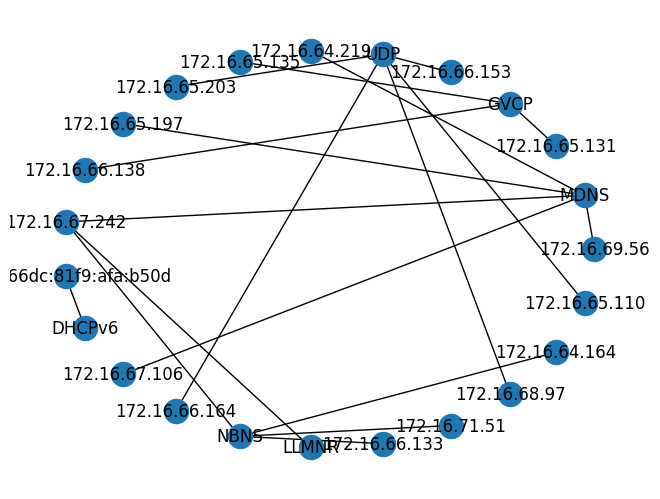

In [ ]:
nx.draw_circular(network,with_labels=True)

In [ ]:
df.loc[df["Protocol"]=="UDP"]

,No.,Time,Source,Destination,Protocol,Length,Info
2,23,0.804879,172.16.66.153,255.255.255.255,UDP,82,62842 > 1947 Len=40
5,50,1.555294,172.16.65.203,255.255.255.255,UDP,79,52735 > 27127 Len=37
14,120,4.510076,172.16.66.164,255.255.255.255,UDP,82,64766 > 1947 Len=40
19,131,4.823702,172.16.66.153,172.16.79.255,UDP,82,62842 > 1947 Len=40
26,145,5.412459,172.16.68.97,172.16.79.255,UDP,86,57621 > 57621 Len=44
36,188,7.213515,172.16.65.110,255.255.255.255,UDP,82,57038 > 1947 Len=40


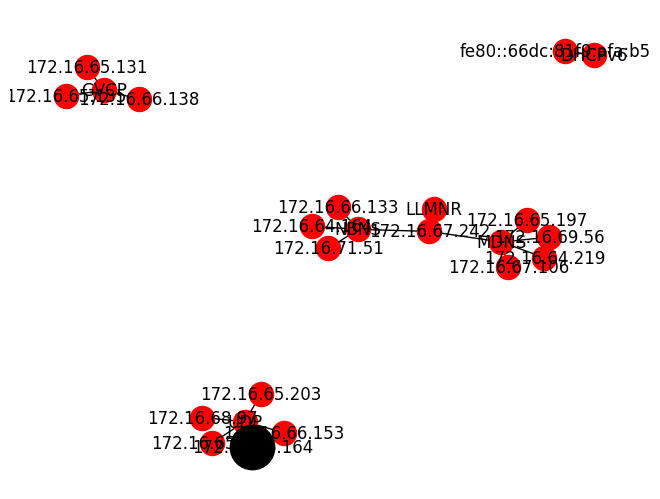

In [ ]:
suspect="172.16.66.164"
pos=nx.spring_layout(network)
nx.draw(network,pos,node_color="red",node_size=300,with_labels=True)
options={"node_size": 1020,"node_color":"k"}
nx.draw_networkx_nodes(network,pos,nodelist=[suspect],**options)
plt.show()